In [ ]:
import torch
import os
from diffusers import StableDiffusionPipeline, UNet2DConditionModel, StableDiffusion3Pipeline

/home/xulu2/anaconda3/envs/GAL/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### RSIDiff based on SD 1.4

In [ ]:
prompt = "a painting of a red apple"
pretrained_model_name_or_path = "CompVis/stable-diffusion-v1-4"
device ="cuda"
pipe = StableDiffusionPipeline.from_pretrained(pretrained_model_name_or_path, torch_dtype=torch.float16)
unet = UNet2DConditionModel.from_pretrained(os.path.join('<PATH_TO_MODEL_DIR>', 'unet'), torch_dtype=torch.float16)
pipe.unet = unet
pipe = pipe.to(device)

100%|██████████| 50/50 [00:02<00:00, 24.06it/s]


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 26.60it/s]


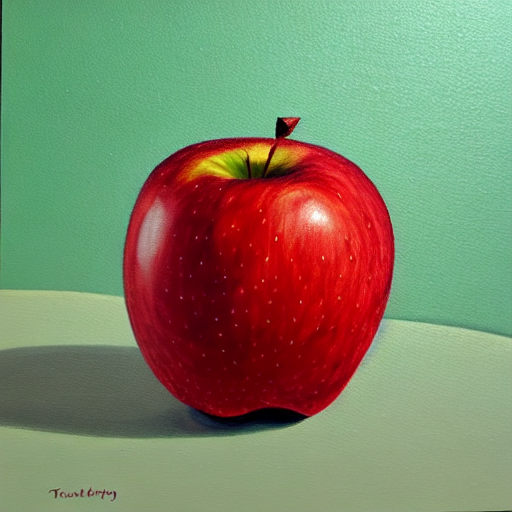

In [6]:
image = pipe(prompt, guidance_scale=7, num_images_per_prompt=1, num_inference_steps=50).images[0]
image

#### RSIDiff based on Diffusion-DPO

In [ ]:
prompt = "a painting of a red apple"
pretrained_model_name_or_path = "runwayml/stable-diffusion-v1-5"
device ="cuda"
pipe = StableDiffusionPipeline.from_pretrained(pretrained_model_name_or_path, torch_dtype=torch.float16)
unet = UNet2DConditionModel.from_pretrained(os.path.join('<PATH_TO_MODEL_DIR>', 'unet'), torch_dtype=torch.float16)
pipe.unet = unet
pipe = pipe.to(device)

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.55it/s]


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 26.10it/s]


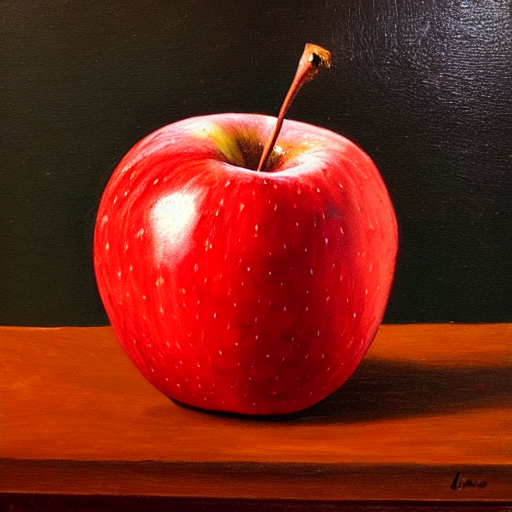

In [10]:
image = pipe(prompt, guidance_scale=7, num_images_per_prompt=1, num_inference_steps=50).images[0]
image

#### RSIDiff based on SD3

In [ ]:
prompt = "a painting of a red apple"
pretrained_model_name_or_path = "stabilityai/stable-diffusion-3-medium-diffusers"
device ="cuda"
pipe = StableDiffusion3Pipeline.from_pretrained(pretrained_model_name_or_path, torch_dtype=torch.float16)
pipe.load_lora_weights("<PATH_TO_MODEL_DIR>", weight_name='pytorch_lora_weights.safetensors')
pipe = pipe.to(device)

Loading pipeline components...: 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]


100%|██████████| 28/28 [00:07<00:00,  3.91it/s]


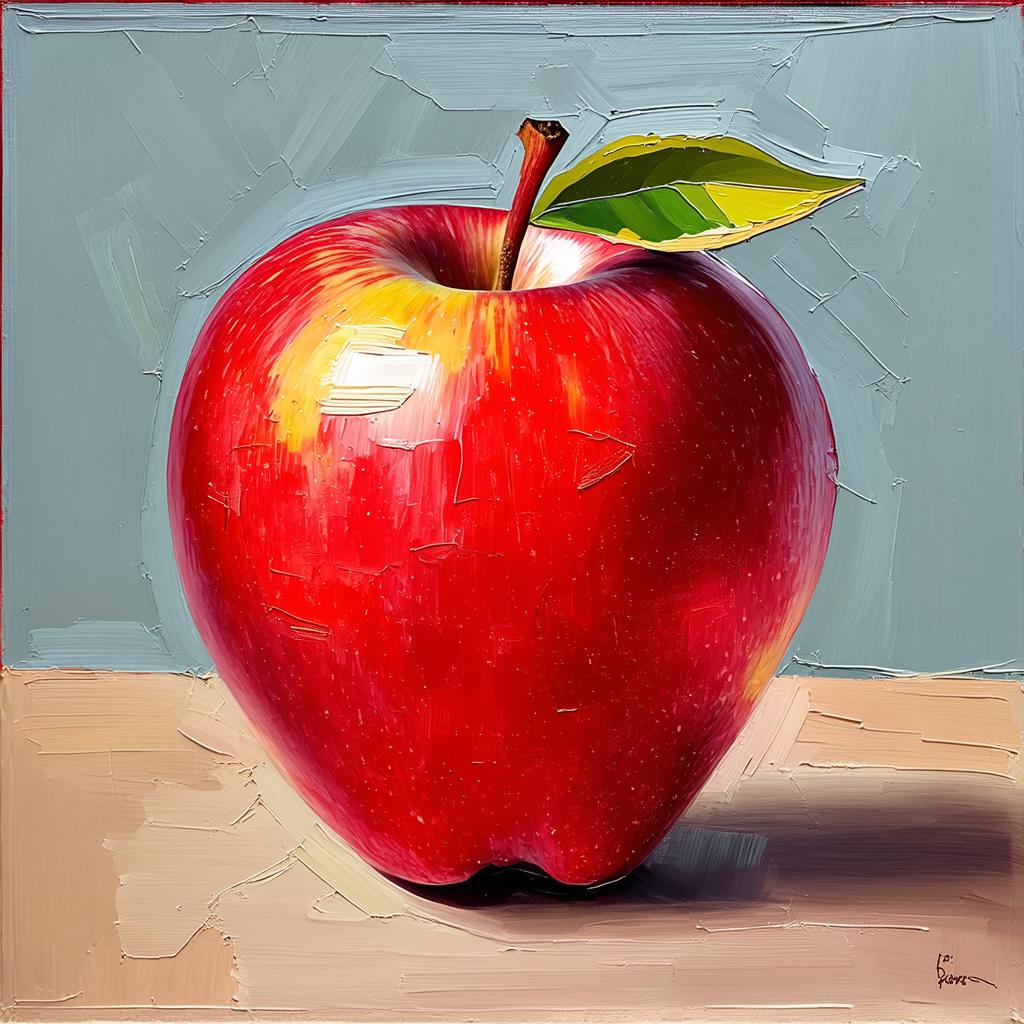

In [13]:
image = pipe(prompt, guidance_scale=7, num_images_per_prompt=1, num_inference_steps=28).images[0]
image